In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

## 1. Q-learning in the wild

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2017-03-09 17:20:46,560] Making new env: Taxi-v2


In [3]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.25,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [4]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward

In [5]:
rewards = []

mean reward 2.08


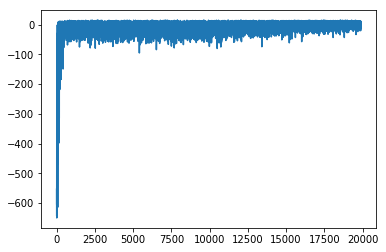

In [6]:
for i in range(20000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
    if i > 10000:
        agent.epsilon *= 0.9999

### 1.1 reducing epsilon

Try decreasing agent epsilon over time to make him reach positive score.

The straightforward way to do so is to reduce epsilon every N games:
* either multiply agent.epsilon by a number less than 1 (e.g. 0.99)
* or substract a small value until it reaches 0

You can, of-course, devise other strategies.

__The goal is to reach positive reward!__

__done__

## 2. SARSA (2 pts)

```<Please go to sarsa.py and implement the missing lines in update method>```

__done__

In [7]:
from sarsa import SarsaAgent
agent = SarsaAgent(alpha=0.5,epsilon=0.25,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [8]:
def play_and_train_sarsa(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        agent.update(s, a, next_s, agent.getAction(next_s), r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward
    
        
    

In [9]:
rewards = []

mean reward 1.03


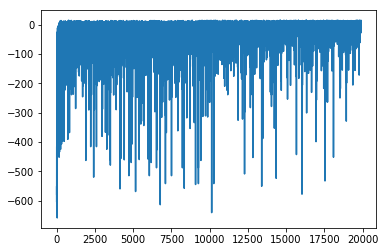

In [10]:
for i in range(20000):
    rewards.append(play_and_train_sarsa(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
    if i > 10000:
        agent.epsilon *= 0.9999

## 3. Continuous state space (2 pts)

Use agent to train on CartPole-v0

This environment has a continuous number of states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

[2017-03-09 17:21:05,896] Making new env: CartPole-v0


first state:[-0.02457648 -0.01502873  0.02653027 -0.04977429]


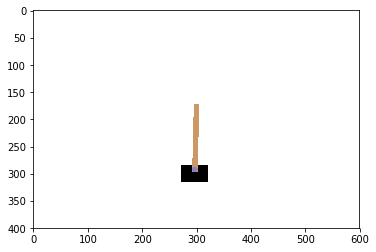

In [11]:
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))
plt.imshow(env.render('rgb_array'))

### Play a few games

We need to estimate observation distributions. To do so, we'll play a few games and record all states.

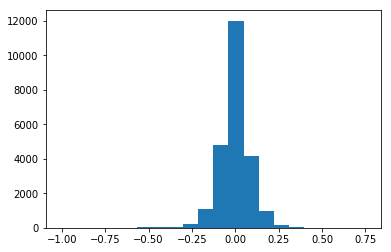

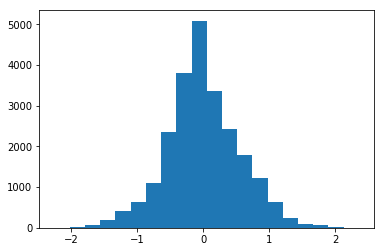

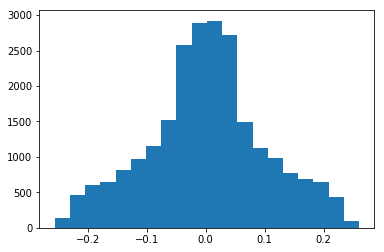

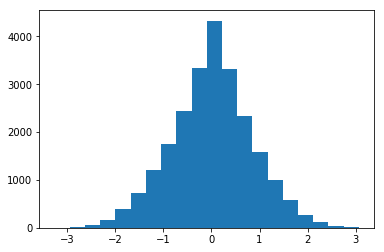

In [12]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s,r,done,_ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i],bins=20)
    plt.show()

## Binarize environment

In [21]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):
    
    def _observation(self,state):    
        
        state[0] = int(2 * state[0])
        state[1] = int(10 * state[1])
        state[2] = int(50 * state[2])
        state[3] = int(20 * state[3])

        return tuple(state)

In [22]:
env = Binarizer(gym.make("CartPole-v0"))

[2017-03-09 17:22:32,631] Making new env: CartPole-v0


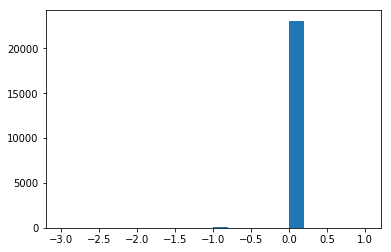

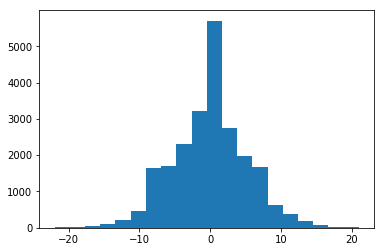

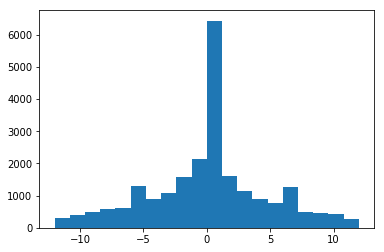

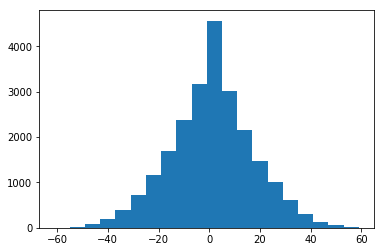

In [23]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s,r,done,_ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i],bins=20)
    plt.show()

## Learn

In [24]:
from qlearning import QLearningAgent
agent = QLearningAgent(alpha=0.5,epsilon=0.4,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [25]:
rewards = []

mean reward 195.95


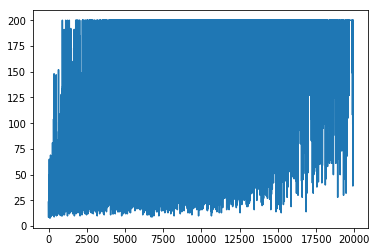

In [26]:
for i in range(20000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
    if i > 9999:
        agent.epsilon *= 0.9999

## Homework

## 4. Expected value SARSA (2 pts)

```<go to expected_value_sarsa.py and implement missing lines in getValue(state)```

In [27]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2017-03-09 17:25:26,656] Making new env: Taxi-v2


In [28]:
from expected_value_sarsa import EVSarsaAgent
agent = EVSarsaAgent(alpha=0.5,epsilon=0.25,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

### Train EV-SARSA

Note that it uses __the same update parameters as__ qlearning so you can use the ```play_and_train``` function from q-learning.

Please try both constant epsilon = 0.25 and decreasing epsilon.

In [29]:
rewards = []

mean reward 3.46


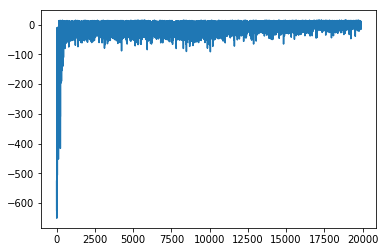

In [26]:
for i in range(20000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
    if i > 9999:
        agent.epsilon *= 0.9999

## 4.2 EV-sarsa on CartPole

Now train the `EVSarsaAgent` on CartPole-v0 env with binarizer you used above for Q-learning.

In [31]:
env = Binarizer(gym.make("CartPole-v0"))
n_actions = env.action_space.n

[2017-03-09 17:25:43,740] Making new env: CartPole-v0


In [32]:
agent = EVSarsaAgent(alpha=0.5,epsilon=0.25,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [33]:
rewards = []

mean reward 198.49


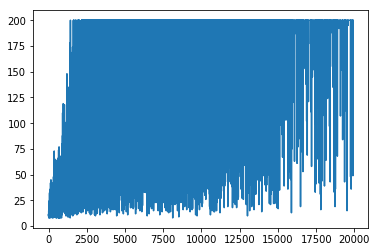

In [34]:
for i in range(20000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
    if i > 9999:
        agent.epsilon *= 0.9999

# 5. Massive experiments

This is the final part of the homework. You can pick any of the 3 tasks listed below. Or take more that one and get score for each of them independently.

_If you feel to cool for this kind of school, see bonus section below - it awwards just as much points_

###  Algorithm comparison (4 points)


For this experiment, you will need to write the code to answer to compare algorithm performance and produce plots/tables with experimental results that can be used to compare them.

Take CartPole or Taxi and compare learning performance of all 3 algorithms under those conditions:

* Constant epsilon 0.25, 0.1 and 0.001
* Decreasing epsilong starting from 0.25 (decrease any way you want)
* It's probably a good idea to plot learning curves (reward / games played)
* At the end of your assignment, please describe in which conditions does each algorithm work better (if at all).

* It's also useful to double-check if experiment results are robust to re-running and if they aren't - average over several runs.
* If you use CartPole-v0, use same binarization techniques.

It is __highly recommended__ that your code automatically builds the plot or prints the table.

A creative approach to visualization or trying out more ideas will be awwarded with bonus points.


In [2]:
import gym
from qlearning import QLearningAgent
from sarsa import SarsaAgent
from expected_value_sarsa import EVSarsaAgent

In [3]:
env = gym.make("Taxi-v2")
n_actions = env.action_space.n

[2017-03-13 12:02:37,823] Making new env: Taxi-v2


In [4]:
def play_and_train_any_agent(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        if agent.__class__.__name__ == 'SarsaAgent':
            agent.update(s, a, next_s, agent.getAction(next_s), r)
        else:
            agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward

### Constant epsilon

In [5]:
from tqdm import tqdm
from IPython.display import clear_output

In [9]:
n_it = 2500

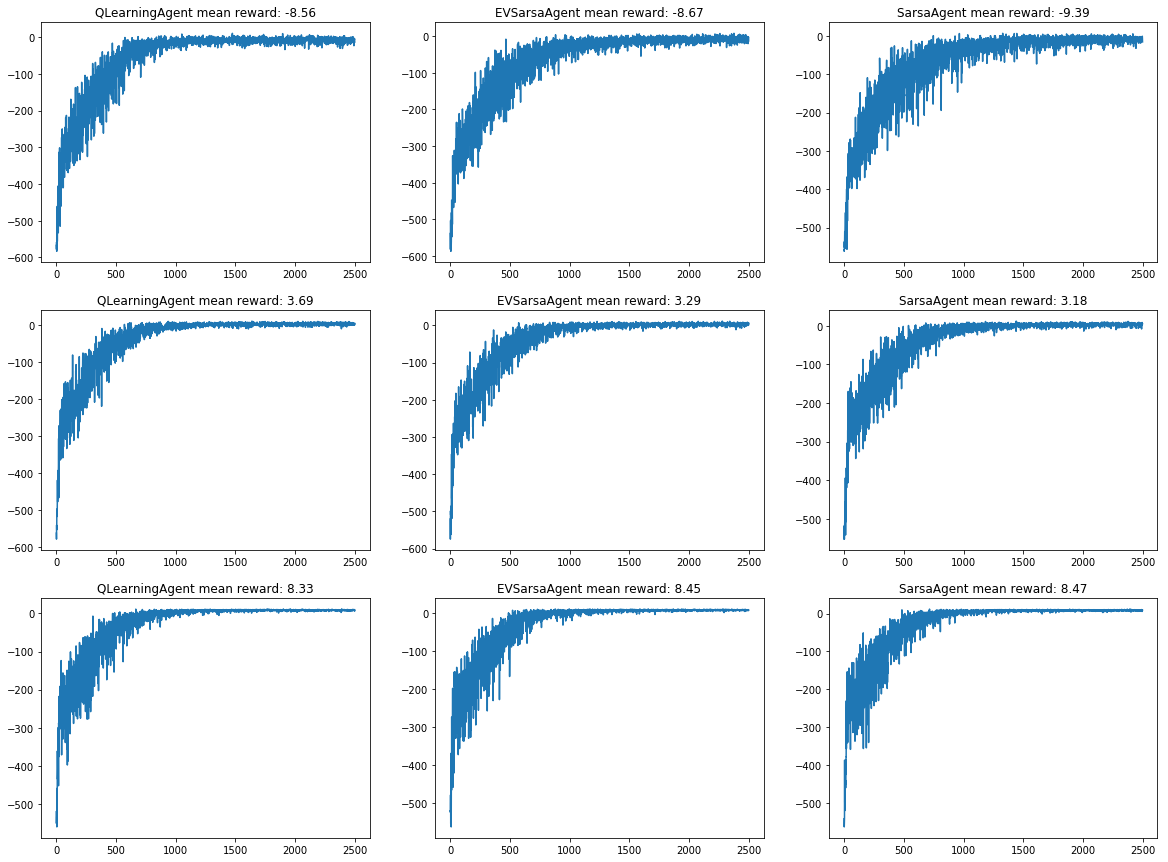

In [17]:
plt.figure(figsize=(20,15))
for i, eps in enumerate([0.25, 0.1, 0.001]):
    alpha = 0.1
    gamma = 0.99
    agents = [QLearningAgent, EVSarsaAgent, SarsaAgent]
    for j, AgentClass in enumerate(agents):
        rewards = np.zeros(n_it)
        # this makes result more stable
        for _ in range(5):
            agent = AgentClass(alpha, eps, gamma, lambda s : range(n_actions))
            for it in tqdm(range(n_it)):
                rewards[it] += play_and_train_any_agent(env,agent)
        clear_output(True)
        plt.subplot(3, 3, 3 * i + j + 1)
        rewards = rewards / 5.
        plt.plot(rewards)
        title = agent.__class__.__name__ + ' mean reward: {:.2f}'.format(np.mean(rewards[-200:]))
        plt.title(title)

### Decreasing eps

Рассмотрим три разных подхода к уменьшению $\varepsilon$. Их отличие состоит в том, насколько много exploration-а они дают алгоритму (чтоб было понятней проще взглянуть на графики)

In [11]:
def soft_decrease(it):
    return np.log(np.log(n_it + 200 - it)) * 0.7 - 1.15

def medium_decrease(it):
    return 0.25 - 0.25 * it / n_it

def hard_decrease(it):
    return 50 / (it + 200)

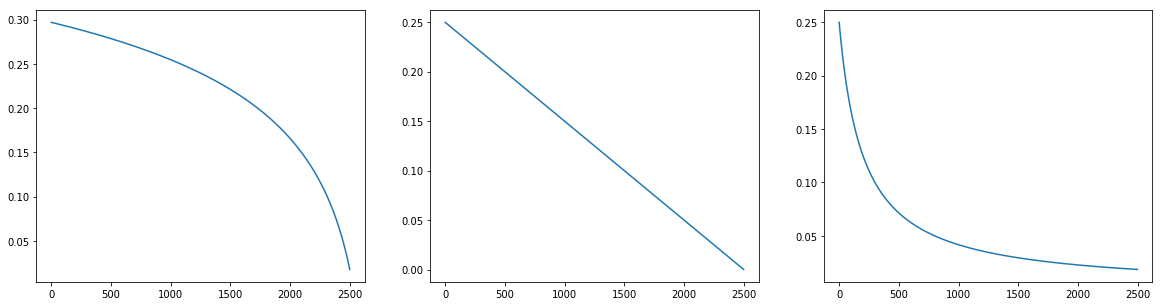

In [12]:
plt.figure(figsize=(20,5))
x = np.arange(2500)

plt.subplot(1, 3, 1)
plt.plot(x, np.vectorize(soft_decrease)(x))

plt.subplot(1, 3, 2)
plt.plot(x, np.vectorize(medium_decrease)(x))

plt.subplot(1, 3, 3)
plt.plot(x, np.vectorize(hard_decrease)(x))

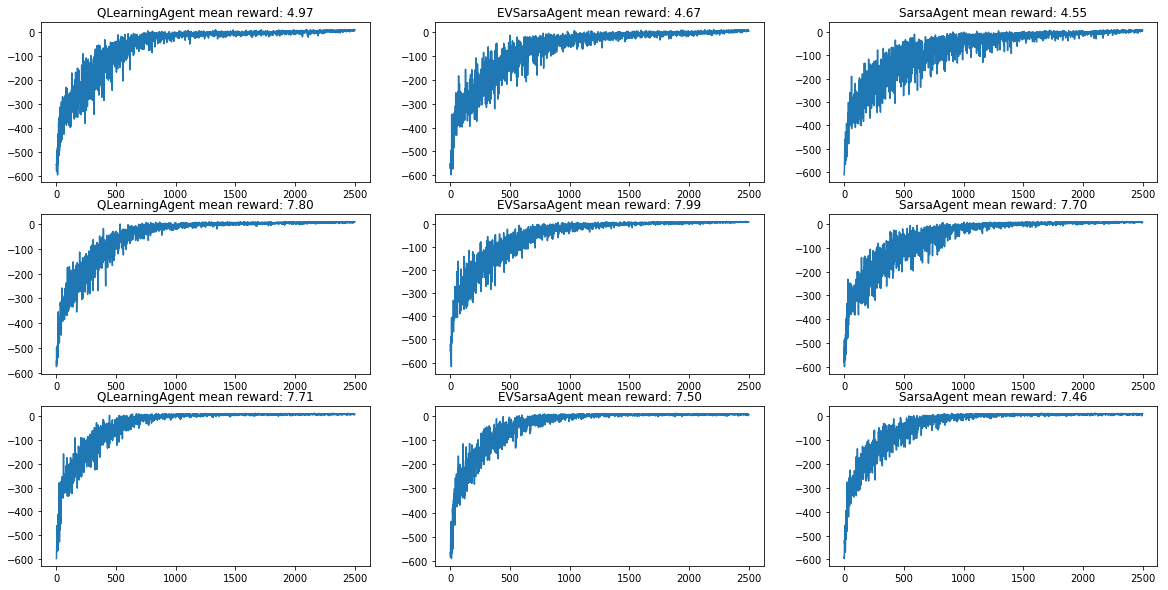

In [15]:
plt.figure(figsize=(20,10))

for i, decrease_function in enumerate([soft_decrease, medium_decrease, hard_decrease]):
    
    agents = [QLearningAgent, EVSarsaAgent, SarsaAgent]

    for j, AgentClass in enumerate(agents):
        rewards = np.zeros(n_it)
        # this makes result more stable
        for _ in range(5):
            agent = AgentClass(alpha, eps, gamma, lambda s : range(n_actions))
            for it in tqdm(range(n_it)):
                agent.epsilon = decrease_function(it)
                rewards[it] += play_and_train_any_agent(env,agent)
        clear_output(True)
        plt.subplot(3, 3, 3 * i + j + 1)
        rewards = rewards / 5.
        plt.plot(rewards)
        title = agent.__class__.__name__ + ' mean reward: {:.2f}'.format(np.mean(rewards[-200:]))
        plt.title(title)

В итоге несложно заметить следующее (для задачи Taxi):

1. QLeaningAgent быстрее всего сходится к жадной стратегии при одном и том же $\varepsilon$.
2. SarsaAgent сходится дольше всего и дает немного худшее качество. Однако, с уменьшением $\varepsilon$ увеличивается и скорость сходимости
3. EVSarsaAgent ведет себя примерно так же как и QLearning.
4. Здесь следовало бы заметить, что QLearning и EVSarsa похожи по своему поведению потому, что это off-policy алгоритмы (в отличие от Sarsa - собственно поэтому в данной задаче он и работает хуже).
5. Также несложно заметить влияние $\varepsilon$ на обучение агента. Логика примерно такая: чем больше мы исследуем в начале - тем лучше будет потом. Но в то же время, сходимость тем дольше, чем больше $\varepsilon$ $\Rightarrow$ надо его уменьшать, начиная с какого-то момента, чтоб улучшить сходимость.
6. По поводу уменьшения эпсилон: несложно заметить, что второй и третий вариант были примерно одинаковы, а первый хуже. Опять таки это произошло по причине того, что $\varepsilon$ начало по факту уменьшаться только в конце - агенты просто не успели сойтись
7. В целом, QLearning лучше работает в задачах, где нет случайностей в среде. Он хорошо работает, если дано хорошее начальное приближение. EVSarsa и Sarsa лучше подходят для задач, где есть некая изменчивость среды. Также, Sarsa лучше подходит для задач, где мы хотим сделать побольше exploration-а.

### Bonus I: Advanced algorithms (4+ points)

Implement any of the three algorithms:
* n-step expected value SARSA or Q-learning
* EV-SARSA or Q-learning( using eligibility traces aka TD(lambda)
* q-learning with experience replay

_(you will likely need to create a new file for that, just like qlearning.py)_

* Show that this algorithm works no worse than those we already implemented for simple problems. 
* Try to find a way to learn faster than with default q-learning.

You will also get +2 points for each algorithm implemented after the first one and any other awesomeness you're up to.


### QLeaningTD

In [1]:
%load_ext autoreload
%autoreload 2
import gym
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from qlearning_td import QLearningTDAgent
from qlearning import QLearningAgent

%matplotlib inline

In [2]:
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2017-03-13 15:59:17,262] Making new env: Taxi-v2


In [3]:
def play_and_train_any_agent(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        if 'Sarsa' in agent.__class__.__name__ :
            agent.update(s, a, next_s, agent.getAction(next_s), r)
        else:
            agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward

In [21]:
agent = QLearningTDAgent(alpha=0.5, epsilon=0.25, discount=0.99, 
                         lambd=0.7, getLegalActions=lambda s : range(n_actions), 
                         el_trace_threshold=0.2)

In [24]:
n_it = 5000

In [25]:
rewards = []

mean reward 8.7


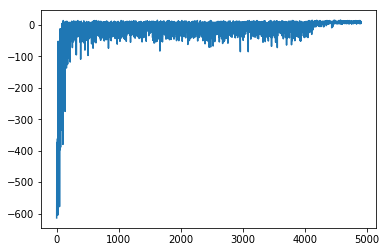

CPU times: user 16.9 s, sys: 12.6 s, total: 29.5 s
Wall time: 15.5 s


In [26]:
%%time
for i in range(n_it):
    rewards.append(play_and_train_any_agent(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
    if i > n_it - 1000:
        agent.epsilon *= 0.99

In [27]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99, 
                       getLegalActions=lambda s : range(n_actions))

In [28]:
rewards = []

mean reward 8.38


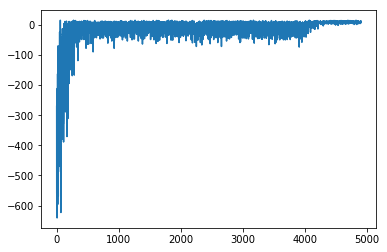

CPU times: user 14.8 s, sys: 12.3 s, total: 27 s
Wall time: 13.3 s


In [29]:
%%time
for i in range(n_it):
    rewards.append(play_and_train_any_agent(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
    if i > n_it - 1000:
        agent.epsilon *= 0.99

#### CartPole

In [36]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):
    
    def _observation(self,state):    
        
        state[0] = int(2 * state[0])
        state[1] = int(10 * state[1])
        state[2] = int(50 * state[2])
        state[3] = int(20 * state[3])

        return tuple(state)
    
env = Binarizer(gym.make("CartPole-v0"))
n_actions = env.action_space.n

[2017-03-13 16:31:29,522] Making new env: CartPole-v0


In [94]:
n_it = 3000

In [95]:
agent = QLearningTDAgent(alpha=0.5, epsilon=0.25, discount=0.99, 
                         lambd=0.9, getLegalActions=lambda s : range(n_actions), 
                         el_trace_threshold=0.5)

In [96]:
rewards = []

mean reward 200.0


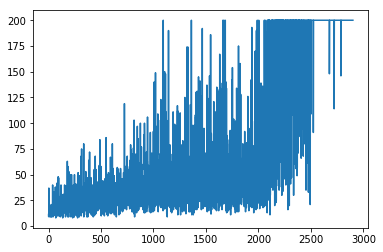

CPU times: user 23.9 s, sys: 8.23 s, total: 32.1 s
Wall time: 23.1 s


In [97]:
%%time
for i in range(n_it):
    rewards.append(play_and_train_any_agent(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
    if i > n_it - 1000:
        agent.epsilon *= 0.99

In [98]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99, 
                       getLegalActions=lambda s : range(n_actions))

In [99]:
rewards = []

mean reward 200.0


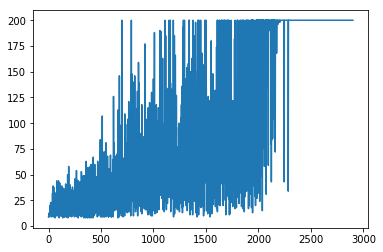

CPU times: user 18.7 s, sys: 8.01 s, total: 26.7 s
Wall time: 17.7 s


In [100]:
%%time
for i in range(n_it):
    rewards.append(play_and_train_any_agent(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
    if i > n_it - 1000:
        agent.epsilon *= 0.99

Как сделать QLerningTD быстрее, чем обычный QLearning, я не так понял. Насколько я понимаю, суть примерно такая: сам по себе QLearningTD работает дольше, но в силу того, как он изменяет Q-значения, он сходится быстрее. Т.е. он может достичь такого же качества при правильном подборе параметров. 

### EVSarsaTD

Делается точно так же, как QLeaningTD.

### Bonus II: Binarization techniques (4+ points total)

Measure how learning performance depends on binarization and try some advanced binarizations.

On CartPole-v0,
* Measure learning speed and final performance against changing the amount of bins (uniformly across all dimensions) __(1 point)__
* Try pre-processing observation with PCA, SparseCoding or any dimensionality reduction method you want, see what happens __(1 point)__

* Apply binarization to solve MountainCar-v0 or LunarLander-v2 __(+2 points each)__

_Warning, Mountaincar-v0 and LunarLander-v2 may train for ~hour. The only sanity check is that the frequency of successes more or less increases._


### Bonus II+

Try applying categorical deep autoencoder as a binarization technique.

Use gumbel-softmax, 
* Explaination and [tutorial](http://blog.evjang.com/2016/11/tutorial-categorical-variational.html), 
* [Example in lasagne](https://gist.github.com/justheuristic/fd08c15dee26dbe95d3e3a17855f3f7a/)

* If you make it work on Cartpole, it's +5. 
* If on LunarLander or MountainCar, it's +5 more.
* If it somehow ends up good on Atari (see week1 homework) or BipedalWalker-v2 or anything serious, it's a full project ( more pts :) )
* If you have any questions or need any help, feel free to ask us!
